The following cell contains all the functions that were provided for this assignement: generating shapes and datasets

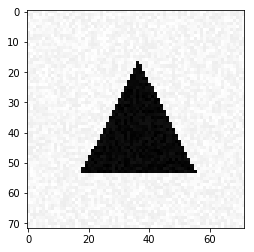

In [1]:


import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline


# On some implementations of matplotlib, you may need to change this value
IMAGE_SIZE = 72

def generate_a_drawing(figsize, U, V, noise=0.0):
    fig = plt.figure(figsize=(figsize,figsize))
    ax = plt.subplot(111)
    plt.axis('Off')
    ax.set_xlim(0,figsize)
    ax.set_ylim(0,figsize)
    ax.fill(U, V, "k")
    fig.canvas.draw()
    imdata = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)[::3].astype(np.float32)
    imdata = imdata + noise * np.random.random(imdata.size)
    plt.close(fig)
    return imdata

def generate_a_rectangle(noise=0.0, free_location=False):
    figsize = 1.0    
    U = np.zeros(4)
    V = np.zeros(4)
    if free_location:
        corners = np.random.random(4)
        top = max(corners[0], corners[1])
        bottom = min(corners[0], corners[1])
        left = min(corners[2], corners[3])
        right = max(corners[2], corners[3])
    else:
        side = (0.3 + 0.7 * np.random.random()) * figsize
        top = figsize/2 + side/2
        bottom = figsize/2 - side/2
        left = bottom
        right = top
    U[0] = U[1] = top
    U[2] = U[3] = bottom
    V[0] = V[3] = left
    V[1] = V[2] = right
    return generate_a_drawing(figsize, U, V, noise)


def generate_a_disk(noise=0.0, free_location=False):
    figsize = 1.0
    if free_location:
        center = np.random.random(2)
    else:
        center = (figsize/2, figsize/2)
    radius = (0.3 + 0.7 * np.random.random()) * figsize/2
    N = 50
    U = np.zeros(N)
    V = np.zeros(N)
    i = 0
    for t in np.linspace(0, 2*np.pi, N):
        U[i] = center[0] + np.cos(t) * radius
        V[i] = center[1] + np.sin(t) * radius
        i = i + 1
    return generate_a_drawing(figsize, U, V, noise)

def generate_a_triangle(noise=0.0, free_location=False):
    figsize = 1.0
    if free_location:
        U = np.random.random(3)
        V = np.random.random(3)
    else:
        size = (0.3 + 0.7 * np.random.random())*figsize/2
        middle = figsize/2
        U = (middle, middle+size, middle-size)
        V = (middle+size, middle-size, middle-size)
    imdata = generate_a_drawing(figsize, U, V, noise)
    return [imdata, [U[0], V[0], U[1], V[1], U[2], V[2]]]


im = generate_a_rectangle(10, True)
plt.imshow(im.reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')

im = generate_a_disk(10)
plt.imshow(im.reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')

[im, v] = generate_a_triangle(20, False)
plt.imshow(im.reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')


def generate_dataset_classification(nb_samples, noise=0.0, free_location=False):
    # Getting im_size:
    im_size = generate_a_rectangle().shape[0]
    X = np.zeros([nb_samples,im_size])
    Y = np.zeros(nb_samples)
    print('Creating data:')
    for i in range(nb_samples):
        if i % 10 == 0:
            print(i)
        category = np.random.randint(3)
        if category == 0:
            X[i] = generate_a_rectangle(noise, free_location)
        elif category == 1: 
            X[i] = generate_a_disk(noise, free_location)
        else:
            [X[i], V] = generate_a_triangle(noise, free_location)
        Y[i] = category
    X = (X + noise) / (255 + 2 * noise)
    return [X, Y]

def generate_test_set_classification():
    np.random.seed(42)
    [X_test, Y_test] = generate_dataset_classification(300, 20, True)
    Y_test = np_utils.to_categorical(Y_test, 3) 
    return [X_test, Y_test]

def generate_dataset_regression(nb_samples, noise=0.0):
    # Getting im_size:
    im_size = generate_a_triangle()[0].shape[0]
    X = np.zeros([nb_samples,im_size])
    Y = np.zeros([nb_samples, 6])
    print('Creating data:')
    for i in range(nb_samples):
        if i % 10 == 0:
            print(i)
        [X[i], Y[i]] = generate_a_triangle(noise, True)
    X = (X + noise) / (255 + 2 * noise)
    return [X, Y]

import matplotlib.patches as patches

def visualize_prediction(x, y):
    fig, ax = plt.subplots(figsize=(5, 5))
    I = x.reshape((IMAGE_SIZE,IMAGE_SIZE))
    ax.imshow(I, extent=[-0.15,1.15,-0.15,1.15],cmap='gray')
    ax.set_xlim([0,1])
    ax.set_ylim([0,1])

    xy = y.reshape(3,2)
    tri = patches.Polygon(xy, closed=True, fill = False, edgecolor = 'r', linewidth = 5, alpha = 0.5)
    ax.add_patch(tri)

    plt.show()

def generate_test_set_regression():
    np.random.seed(42)
    [X_test, Y_test] = generate_dataset_regression(300, 20)
    return [X_test, Y_test]



# Part I: Classification of geometric shapes

Using a training set of images of simple geometric shapes (rectangle, disk, triangle)
centered in the images.

In [137]:

# Building and training of a linear classifier using Keras to classify geometric shapes (rectangle, disk, triangle)
from keras.utils import np_utils


#generate training set
[X_train, Y_train] = generate_dataset_classification(300, 20)
Y_train = np_utils.to_categorical(Y_train, 3) # convert Y_train to a list of binaries

#generate set for validation
[X_test, Y_test] = generate_dataset_classification(300, 20)
Y_test = np_utils.to_categorical(Y_test, 3) 

Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290


In [140]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import SGD,Adam
from keras.layers import Dense, Activation

#Building a model 
model=Sequential([Dense(10,input_shape=(5184,)), Activation('relu'), Dense(3),Activation('softmax')])

sgd = SGD(lr=0.01,decay=1e-6, momentum=0.9,nesterov=True)
model.compile(loss='mean_squared_error',optimizer=sgd, metrics=['accuracy'])

#using a second optimizer 
#adam = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
#model.compile(loss='mean_squared_error',optimizer=adam, metrics=['accuracy'])


history=model.fit(X_train, Y_train, epochs=20,validation_data=(X_test,Y_test))

#make a prediction on a disk, the expected output should be 1
x_test = generate_a_disk()
x_test = x_test.reshape(1, x_test.shape[0])
print("the class predicted calss is :", np.argmax(model.predict(x_test))) #max probability is the predicted class


Train on 300 samples, validate on 300 samples
Epoch 1/20
300/300 [==============================] - 1s 3ms/step - loss: 0.2256 - acc: 0.3833 - val_loss: 0.1953 - val_acc: 0.4900
Epoch 2/20
300/300 [==============================] - 0s 269us/step - loss: 0.1941 - acc: 0.4967 - val_loss: 0.2027 - val_acc: 0.2967
Epoch 3/20
300/300 [==============================] - 0s 294us/step - loss: 0.1685 - acc: 0.5500 - val_loss: 0.1707 - val_acc: 0.5733
Epoch 4/20
300/300 [==============================] - 0s 266us/step - loss: 0.1545 - acc: 0.6067 - val_loss: 0.1555 - val_acc: 0.6900
Epoch 5/20
300/300 [==============================] - 0s 269us/step - loss: 0.1448 - acc: 0.6600 - val_loss: 0.1533 - val_acc: 0.7600
Epoch 6/20
300/300 [==============================] - 0s 266us/step - loss: 0.1264 - acc: 0.7667 - val_loss: 0.1972 - val_acc: 0.4100
Epoch 7/20
300/300 [==============================] - 0s 269us/step - loss: 0.1306 - acc: 0.7667 - val_loss: 0.1346 - val_acc: 0.8233
Epoch 8/20
300/300

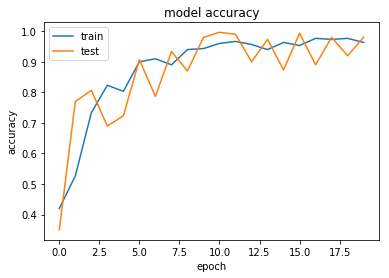

In [112]:
#Visualisation of training
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#The model performs as well on the test set and training set( after 6 epochs),
#thus we can assume that there is not overfitting of the training set

# Part II: a more difficult classification problem

Now, the shapes are allowed to move within the images and change dimensions. 

In [113]:
#generate training and test set
[X_train1, Y_train1] = generate_dataset_classification(300, 20, True)
[X_test1, Y_test1] = generate_test_set_classification()
X_train1 = X_train1.reshape(X_train1.shape[0], 72, 72,1)
Y_train1 = np_utils.to_categorical(Y_train1, 3)

X_test1 = X_test1.reshape(X_test1.shape[0], 72, 72,1)
#Y_test1 = np_utils.to_categorical(Y_test1, 3)

Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290


In [114]:
from keras.optimizers import SGD,Adam
from keras.layers import Flatten

# model convolutional neural network (1 layer 32 neurons) and one hidden layer of 100 neurons
model=Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu',input_shape=(72,72,1 )))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(100,activation='relu'))
model.add(Dense(3, activation='softmax'))

#optimizer =sgd
sgd = SGD(lr=0.01,decay=1e-6, momentum=0.9,nesterov=True)
model.compile(loss='mean_squared_error',optimizer=sgd, metrics=['accuracy'])

history=model.fit(X_train1, Y_train1,validation_data=(X_test1,Y_test1), epochs=20)


Train on 300 samples, validate on 300 samples
Epoch 1/20
300/300 [==============================] - 3s 10ms/step - loss: 0.2249 - acc: 0.3533 - val_loss: 0.2134 - val_acc: 0.4133
Epoch 2/20
300/300 [==============================] - 2s 7ms/step - loss: 0.2136 - acc: 0.4200 - val_loss: 0.2115 - val_acc: 0.3300
Epoch 3/20
300/300 [==============================] - 2s 7ms/step - loss: 0.1996 - acc: 0.5567 - val_loss: 0.2000 - val_acc: 0.5200
Epoch 4/20
300/300 [==============================] - 2s 7ms/step - loss: 0.1843 - acc: 0.6067 - val_loss: 0.2016 - val_acc: 0.3267
Epoch 5/20
300/300 [==============================] - 2s 7ms/step - loss: 0.1757 - acc: 0.5767 - val_loss: 0.1858 - val_acc: 0.4933
Epoch 6/20
300/300 [==============================] - 2s 7ms/step - loss: 0.1600 - acc: 0.6433 - val_loss: 0.2266 - val_acc: 0.4900
Epoch 7/20
300/300 [==============================] - 2s 7ms/step - loss: 0.1631 - acc: 0.6000 - val_loss: 0.1784 - val_acc: 0.5933
Epoch 8/20
300/300 [=========

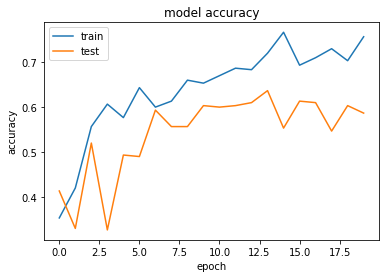

In [115]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# PArt III: A regression problem

In [117]:
import math

#generating training and testing set
[X_train2, Y_train2] = generate_dataset_regression(300, 20)
[X_test2, Y_test2] = generate_test_set_regression()

Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290


In [124]:
#reshape data for the model
X_train2=X_train2.reshape(X_train2.shape[0],72,72,1)
X_test2=X_test2.reshape(X_test2.shape[0],72,72,1)

In [128]:
def normalizeY(Y):
    Yn=[]
    for train in Y:
        Ytrain=[]
        for k in range(3):
            norm=math.sqrt(train[2*k]**2+train[2*k+1]**2)
            Ytrain+=[train[2*k]/norm,train[2*k+1]/norm]
        Yn+=[Ytrain]
    
    return(Yn)

Y_train2=np.array(normalizeY(Y_train2))
Y_train2=Y_train2.reshape(Y_train2.shape[0],6)
Y_test2=np.array(normalizeY(Y_test2))
Y_test2=Y_train2.reshape(Y_test2.shape[0],6)
#Y_train2=Y_train2.reshape(Y_train2.shape[0],6,1)

In [130]:
#Building a model for regression
model2 = Sequential()
model2.add(Dense(50, activation="relu", input_shape=(72,72,1)))
model2.add(Dense(20))
model2.add(Flatten())
model2.add(Dense(6,activation='linear'))

#optimizers               
sgd = SGD(lr=0.01,decay=1e-6, momentum=0.9,nesterov=True)
adam = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model2.compile(loss='mean_squared_error',optimizer=adam, metrics=['mean_squared_error'])

history=model2.fit(X_train2, Y_train2, epochs=10,validation_data=(X_test2,Y_test2))

Train on 300 samples, validate on 300 samples
Epoch 1/10
300/300 [==============================] - 4s 13ms/step - loss: 16.9199 - mean_squared_error: 16.9199 - val_loss: 13.0276 - val_mean_squared_error: 13.0276
Epoch 2/10
300/300 [==============================] - 2s 8ms/step - loss: 4.6473 - mean_squared_error: 4.6473 - val_loss: 0.1881 - val_mean_squared_error: 0.1881
Epoch 3/10
300/300 [==============================] - 2s 8ms/step - loss: 1.0424 - mean_squared_error: 1.0424 - val_loss: 0.4321 - val_mean_squared_error: 0.4321
Epoch 4/10
300/300 [==============================] - 2s 8ms/step - loss: 0.4866 - mean_squared_error: 0.4866 - val_loss: 0.3869 - val_mean_squared_error: 0.3869
Epoch 5/10
300/300 [==============================] - 3s 8ms/step - loss: 0.2308 - mean_squared_error: 0.2308 - val_loss: 0.2168 - val_mean_squared_error: 0.2168
Epoch 6/10
300/300 [==============================] - 3s 8ms/step - loss: 0.1250 - mean_squared_error: 0.1250 - val_loss: 0.1190 - val_mean

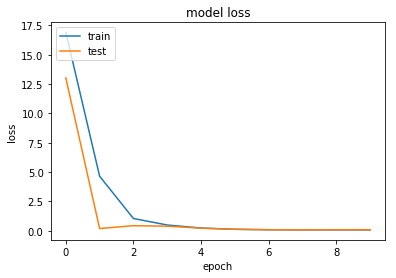

In [131]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Part IV: Denoising of an image

Implement a hourglass network for denoising: Modifying the generate_a_* functions to generate
pairs of images, where one image has noise with random amplitude, and the second image has the
same content but without the noise. Train your network to predict a noise-free image given a noisy
image as input.

In [132]:
import random

#modified version of the provided function:
#instead of returning the triangle and its vertices,it returns the triangle without noise and with a random noise
def generate_a_triangle2(free_location=False):
    figsize = 1.0
    if free_location:
        U = np.random.random(3)
        V = np.random.random(3)
    else:
        size = (0.3 + 0.7 * np.random.random())*figsize/2
        middle = figsize/2
        U = (middle, middle+size, middle-size)
        V = (middle+size, middle-size, middle-size)
    noise=random.randint(1,41)
    imdata1 = generate_a_drawing(figsize, U, V, noise)
    imdata2 = generate_a_drawing(figsize, U, V, 0)
    return [imdata1,imdata2]


#generate a sample : training set is a triangle with noise and the label is the triangle associated without noise

def generate_reg_set(nb_sample):
    im_size = generate_a_triangle()[0].shape[0]
    X = np.zeros([nb_sample,im_size])
    Y = np.zeros([nb_sample, im_size])
    NOISE=np.zeros(nb_sample)
    for i in range(nb_sample):
        noise=random.randint(1,41)
        if i % 10 == 0:
            print(i)
        X[i] = generate_a_triangle2()[0]
        Y[i]= generate_a_triangle2()[1]
        NOISE[i]=noise
    noise1=max(NOISE)
    X = (X + noise1) / (255 + 2 * noise1)
    Y=Y/255    
    
    
    return [X,Y]

[X_train3,Y_train3]=generate_reg_set(200)
[X_test3,Y_test3]=generate_reg_set(200)

0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190


In [134]:
#regression problem 5184 inputs (for a triangle with noise) and 5185 outputs for the associated triangle without noise

model3 = Sequential()
#model with 2 hidden layers of 400 neurons
model3.add(Dense(400, activation="relu", input_shape=(5184,)))
model3.add(Dense(400))
model3.add(Dense(5184,activation='linear'))


sgd = SGD(lr=0.01,decay=1e-6, momentum=0.9,nesterov=True)
model3.compile(loss='mean_squared_error',optimizer=sgd, metrics=['mean_squared_error'])
history=model3.fit(X_train3, Y_train3, epochs=20,validation_data=(X_test3,Y_test3))

Train on 200 samples, validate on 200 samples
Epoch 1/20
200/200 [==============================] - 2s 8ms/step - loss: 0.9019 - mean_squared_error: 0.9019 - val_loss: 0.8341 - val_mean_squared_error: 0.8341
Epoch 2/20
200/200 [==============================] - 1s 3ms/step - loss: 0.8266 - mean_squared_error: 0.8266 - val_loss: 0.8042 - val_mean_squared_error: 0.8042
Epoch 3/20
200/200 [==============================] - 1s 4ms/step - loss: 0.7919 - mean_squared_error: 0.7919 - val_loss: 0.7554 - val_mean_squared_error: 0.7554
Epoch 4/20
200/200 [==============================] - 1s 3ms/step - loss: 0.7307 - mean_squared_error: 0.7307 - val_loss: 0.6699 - val_mean_squared_error: 0.6699
Epoch 5/20
200/200 [==============================] - 1s 3ms/step - loss: 0.6280 - mean_squared_error: 0.6280 - val_loss: 0.5391 - val_mean_squared_error: 0.5391
Epoch 6/20
200/200 [==============================] - 1s 3ms/step - loss: 0.4834 - mean_squared_error: 0.4834 - val_loss: 0.3781 - val_mean_squa

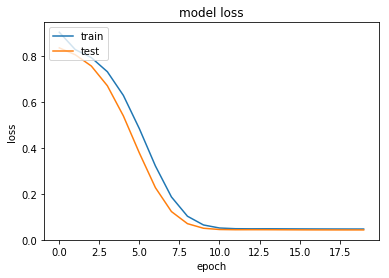

In [135]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()